In [1]:
#pip install tensorflow

## prepare

In [1]:
import warnings 
warnings.filterwarnings("ignore")

import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, execute
from qiskit.algorithms.optimizers import COBYLA
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator
from qiskit_machine_learning.circuit.library import RawFeatureVector
from qiskit.circuit import Parameter
from qiskit.quantum_info import Statevector
import pickle

from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import normalize

2023-01-29 11:16:12.113502: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-29 11:16:12.340753: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-29 11:16:12.340801: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-29 11:16:14.403717: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

In [3]:
X_train[0].shape

(28, 28)

## normalize

In [4]:
2**int(np.ceil(np.log2(X_train[0].size)))

1024

In [5]:
int(np.ceil(np.log2(X_train.size)))

26

In [6]:
np.zeros(int(np.ceil(np.log2(X_train.size))))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [7]:
def normalize(x):
    """
    """
    x = x.flatten()
    normalized_vector = x / np.linalg.norm(x)
    total_size = 2**int(np.ceil(np.log2(X_train[0].size)))
    normalized_vector = [*normalized_vector, *np.zeros(total_size-len(normalized_vector))]
    return normalized_vector

In [8]:
def de_normalize(normalized_vector, x):
    return normalized_vector * np.linalg.norm(x.flatten())

In [9]:
normalized_vector = np.array(normalize(X_train[0]))
de_normalized_vector = de_normalize(normalized_vector,np.array(X_train[0]))

In [10]:
X_train_list = []
for i in range(100):
    X_train_list.append(normalize(X_train[i]))

np.shape(X_train_list)

(100, 1024)

In [11]:
X_test_list = []
for i in range(100):
    X_test_list.append(normalize(X_test[i]))
np.shape(X_test_list)

(100, 1024)

## encoding

In [12]:
print('before normalize:')
display(plt.imshow(X_train[0]))

before normalize:
Traceback (most recent call last):
  Input In [12] in <cell line: 2>
    display(plt.imshow(X_train[0]))
NameError: name 'plt' is not defined

Use %tb to get the full traceback.


after normalize:


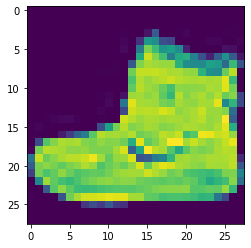

In [18]:
normalized_vector = normalize(X_train[0])
#print(normalized_vector)
import matplotlib.pyplot as plt
print('after normalize:')
plt.imshow(np.reshape(np.array(normalized_vector[:784]),X_train[0].shape))

## circuit

In [19]:
state = normalized_vector
n = 10
qc = RawFeatureVector(2**n)
#qc = qc.bind_parameters(state)
#qc.measure_all()

#qc_ = qc.decompose(reps=20)
#print(qc_.depth())
#print(f"Circuit operations: {qc_.count_ops()}")
## qc.decompose(reps = 9).draw()
qc.num_parameters

1024

In [20]:
#import pennylane as qml
#dev = qml.device("default.qubit", wires=10)
#
#def block(weights, wires):
#    qml.CNOT(wires=[wires[0],wires[1]])
#    qml.RY(weights[0], wires=wires[0])
#    qml.RY(weights[1], wires=wires[1])
#
#    
#import pennylane as qml
#
#n_wires = dev.num_wires
#n_block_wires = 2
#n_params_block = 2
#n_blocks = qml.TTN.get_n_blocks(range(n_wires),n_block_wires)
#n_blocks
#    
#@qml.qnode(dev)
#def circuit(weights, x):
#
#    qml.AmplitudeEmbedding(x, wires=[i for i in range(10)],normalize=True,pad_with=True)
#
#    for w in weights:
#
#        qml.TTN(range(n_wires),n_block_wires,block, n_params_block, w)
#        #print(w)
#    #print(x)
#    
#    return qml.expval(qml.PauliZ(3))
#np.random.seed(0)
#num_layers = 1
#weights_init = 2*np.pi * np.random.randn(num_layers,n_blocks, n_params_block)
#print(weights_init.shape)
#
#print(qml.draw(circuit,expansion_strategy='device',wire_order=[i for i in range(10)])(weights_init,np.asarray(X_train[0])))

In [21]:
#from qbraid import circuit_wrapper
# maybe we can use qbraid sdk
#TTN_circ = circuit_wrapper(n_blocks).transpile('qiskit')
#TTN_circ.draw()
#print(qml.draw(n_blocks)(weights))
#qml.draw(n_blocks)([0,0,0,0])

In [22]:
#def _block(self, qubits, symbols):
#
#    #assert len(qubits) == 2
#    #assert len(qubits) == len(symbols)
#    qc = QuantumCircuit()
#    qc.y()
#    
#    #
#    #return cirq.Circuit(
#    #    cirq.Y(qubits[0])**symbols[0],
#    #    cirq.Y(qubits[1])**symbols[1], cirq.CNOT(qubits[0], qubits[1]))

In [23]:
#data_symbols = []
#
#ansatz = QuantumCircuit()
#for l in range(n_layers):
#    for idx, w in enumerate(ind_gates):
#        ansatz.append(block(w, var_symbols[l, idx]))
#    
#    ## Re-encoding layer
#    #if drc and (l < n_layers - 1):
#    #    data_circuit, expr = cirq.flatten(
#    #        feature_map.build(qubits, in_symbols[l]))
#    #    circuit += data_circuit
#    #    data_symbols += list(expr.values())

In [24]:
from qiskit.circuit.library import RealAmplitudes, EfficientSU2
ansatz = RealAmplitudes(10, reps=2)

# todo: TTN, example: https://github.com/Gopal-Dahale/qml-hep-lhc/blob/0632e2bcf892965303faa3ebc7322bc87b9ad6b3/qml_hep_lhc/ansatzes/ttn.py
# def tnn():

#ansatz.draw()
#ansatz_ = ansatz.decompose(reps=20)
#print(ansatz_.depth())
#print(f"Circuit operations: {ansatz_.count_ops()}")

In [25]:
EfficientSU2(4,reps=97).num_parameters

784

## test encoding & decoding (1st task)

In [26]:
import qiskit
from qiskit import BasicAer

def simulate(circ: qiskit.QuantumCircuit) -> dict:
    """Simulate the circuit, give the state vector as the result."""
    backend = BasicAer.get_backend('statevector_simulator')
    job = execute(circ, backend)
    result = job.result()
    state_vector = result.get_statevector()
    
    histogram = dict()
    for i in range(len(state_vector)):
        population = abs(state_vector[i]) ** 2
        if population > 1e-9:
            histogram[i] = population
    
    return histogram

In [27]:
histogram = simulate(qc.bind_parameters(normalized_vector))
print(histogram)

{96: 6.435473980059361e-08, 99: 1.0875951026300376e-05, 100: 0.0003429464083973666, 103: 6.435473980063946e-08, 104: 1.029675836809481e-06, 109: 6.435473980059199e-08, 110: 6.435473980059214e-08, 124: 5.791926582053541e-07, 126: 8.340374278157023e-05, 127: 0.001190305267351793, 128: 0.0010379775982437844, 129: 0.00024737961979348535, 130: 0.0001876584212585344, 134: 6.435473980058929e-08, 135: 5.791926582053047e-07, 136: 1.0296758368094123e-06, 139: 5.791926582052729e-07, 152: 2.3167706328214167e-06, 154: 0.0006695467128853881, 155: 0.0026781868515415525, 156: 0.001993452420063207, 157: 0.00115555370785948, 158: 0.001334459884505117, 159: 0.0009736228584431939, 160: 3.4043657354514076e-05, 165: 9.26708253128558e-06, 166: 6.435473980059434e-06, 182: 0.0015461226237092687, 183: 0.003584301587933887, 184: 0.0027575362457156727, 185: 0.0020390155758420324, 186: 0.0007367974159770059, 187: 0.0015661369477872724, 188: 0.0016681392103712123, 189: 0.0007645986635708676, 190: 0.0002635970142232

In [28]:
new_histogram = {}

for key in range(len(qc.parameters)):
    if key in histogram:
        new_histogram[key] = histogram[key]
    else:
        new_histogram[key] = 0
print(new_histogram)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 6.435473980059361e-08, 97: 0, 98: 0, 99: 1.0875951026300376e-05, 100: 0.0003429464083973666, 101: 0, 102: 0, 103: 6.435473980063946e-08, 104: 1.029675836809481e-06, 105: 0, 106: 0, 107: 0, 108: 0, 109: 6.435473980059199e-08, 110: 6.435473980059214e-08, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 

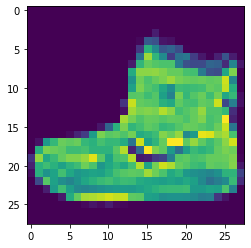

In [29]:
import matplotlib.pyplot as plt
after_ = np.array(list(new_histogram.values())[:784])
plt.imshow(np.reshape(after_,X_train[0].shape))

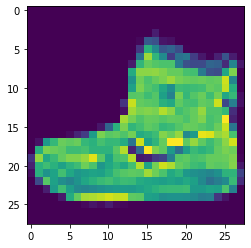

In [30]:
de_normalized_vector = de_normalize(after_,X_train[0])
plt.imshow(np.reshape(after_,X_train[0].shape))

In [31]:
def encode_qiskit(x,num_qubit=10):
    normalized_vector = normalize(x)
    qc = RawFeatureVector(2**num_qubit)
    qc.bind_parameters(normalized_vector)
    return qc

In [32]:
def decode(histogram):
    new_histogram = {}

    for key in range(len(qc.parameters)):
        if key in histogram:
            new_histogram[key] = histogram[key]
        else:
            new_histogram[key] = 0
    #print(new_histogram)
    after_ = np.array(list(new_histogram.values())[:784])
    return after_

In [34]:
#grade part1
from part1 import encode_qiskit,decode

n=len(dataset)
mse=0
gatecount=0

for data in (X_train,Y_train):
    #encode image into circuit
    circuit=encode_qiskit(data[0])
    
    #simulate circuit
    histogram=simulate(circuit)
    
    gatecount+=count_gates(circuit)[2]
    
    #reconstruct 
    image_re=decode(histogram)
    
    #calculate mse
    mse+=image_mse(np.asarray(data['image']),np.asarray(image_re))
    
#fidelity of reconstruction
f=1-mse
gatecount=gatecount/n

#score for part1
print(f*(0.999**gatecount))

Traceback (most recent call last):
  Input In [34] in <cell line: 2>
    from part1 import encode_qiskit,decode
ModuleNotFoundError: No module named 'part1'

Use %tb to get the full traceback.


In [35]:
#traning_qc = QuantumCircuit(10,10)
#traning_qc.append(qc,[i for i in range(10)])
#traning_qc.append(ansatz_,[i for i in range(10)])
##qc.append(ansatz)
#traning_qc.draw()

## train classifier circuit (2nd task)
is there a way to get the best classifier?  

Important Final Note: The goal of this problem is to explore quantum computing approaches to machine learning problems. To this end, the final score will take into account the degree of quantumness in the program. Preference will be given to creative solutions with a minimal amount of classical processing in the final solution.

reference:   
[1] calculate result from probability, https://github.com/ericardomuten/quantum_image_classifier  
[2] MPS tensor circuit(ideal classifier circuit), https://journals.aps.org/prresearch/pdf/10.1103/PhysRevResearch.4.043007 , good example from qamp-mentorship https://github.com/qiskit-advocate/qamp-fall-22/issues/28   
[3] Good idea about amplitude circuit, https://journals.aps.org/prx/pdf/10.1103/PhysRevX.7.031041

In [36]:
from IPython.display import clear_output
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [40]:
from qiskit.algorithms.optimizers import SPSA

In [41]:
from qiskit_machine_learning.algorithms.classifiers import VQC
vqc = VQC(
    feature_map=qc,
    ansatz=RealAmplitudes(10, reps=2),
    loss="cross_entropy",
    optimizer=SPSA(maxiter=300),
    quantum_instance=Aer.get_backend('statevector_simulator'),
    callback=callback_graph
)

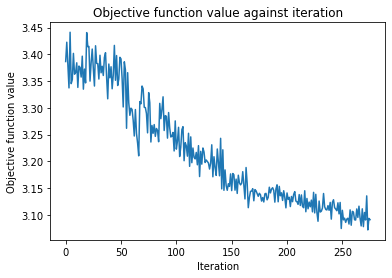

In [ ]:
import time
start = time.time()

objective_func_vals = []
vqc.fit(np.array(X_train_list),np.array(Y_train[:100]))
plt.rcParams["figure.figsize"] = (6, 4)

own_elapsed = time.time() - start
print("Time elapsed: ", own_elapsed)

In [35]:
vqc.score(X_test_list[:50],Y_test[:50])

0.24

In [20]:
classifier = ansatz.bind_parameters(vqc._fit_result.x).qasm()
print(classifier)

OPENQASM 2.0;
include "qelib1.inc";
gate gate_RealAmplitudes(param0,param1,param2,param3,param4,param5,param6,param7,param8,param9,param10,param11,param12,param13,param14,param15,param16,param17,param18,param19,param20,param21,param22,param23,param24,param25,param26,param27,param28,param29) q0,q1,q2,q3,q4,q5,q6,q7,q8,q9 { ry(0.266317714019139) q0; ry(1.32035044188513) q1; ry(0.375724625916453) q2; ry(-0.145527578194223) q3; ry(1.24796981173025) q4; ry(-0.3722525242738) q5; ry(0.98731246639232) q6; ry(1.98782341512519) q7; ry(1.66430495324693) q8; ry(0.760045740348774) q9; cx q8,q9; cx q7,q8; cx q6,q7; cx q5,q6; cx q4,q5; cx q3,q4; cx q2,q3; cx q1,q2; cx q0,q1; ry(1.76943425343952) q0; ry(1.54002486179664) q1; ry(1.5166941190635) q2; ry(2.08820456685236) q3; ry(0.502872321522427) q4; ry(0.5226897740692) q5; ry(1.34895736320983) q6; ry(0.17808386546728) q7; ry(1.48787325816064) q8; ry(1.19251464386051) q9; cx q8,q9; cx q7,q8; cx q6,q7; cx q5,q6; cx q4,q5; cx q3,q4; cx q2,q3; cx q1,q2; cx

In [36]:
from qiskit.algorithms.optimizers import SPSA

In [47]:
vqc_esu2_spsa300 = VQC(
    feature_map=qc,
    ansatz=EfficientSU2(num_qubits=10, reps=20),
    loss="cross_entropy",
    optimizer=SPSA(maxiter=300),
    quantum_instance=Aer.get_backend('statevector_simulator'),
    callback=callback_graph
)

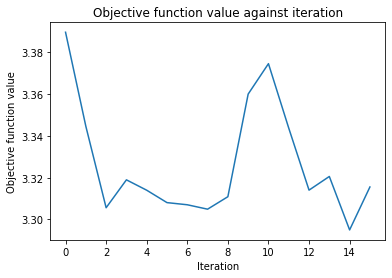

In [ ]:
start = time.time()

objective_func_vals = []
vqc_esu2_spsa300.fit(np.array(X_train_list),np.array(Y_train[:100]))
plt.rcParams["figure.figsize"] = (6, 4)

own_elapsed = time.time() - start
print("Time elapsed: ", own_elapsed)

In [ ]:
vqc_esu2_spsa300.score(X_test_list[:50],Y_test[:50])

In [20]:
classifier = ansatz.bind_parameters(vqc._fit_result.x).qasm()
print(classifier)

OPENQASM 2.0;
include "qelib1.inc";
gate gate_RealAmplitudes(param0,param1,param2,param3,param4,param5,param6,param7,param8,param9,param10,param11,param12,param13,param14,param15,param16,param17,param18,param19,param20,param21,param22,param23,param24,param25,param26,param27,param28,param29) q0,q1,q2,q3,q4,q5,q6,q7,q8,q9 { ry(0.266317714019139) q0; ry(1.32035044188513) q1; ry(0.375724625916453) q2; ry(-0.145527578194223) q3; ry(1.24796981173025) q4; ry(-0.3722525242738) q5; ry(0.98731246639232) q6; ry(1.98782341512519) q7; ry(1.66430495324693) q8; ry(0.760045740348774) q9; cx q8,q9; cx q7,q8; cx q6,q7; cx q5,q6; cx q4,q5; cx q3,q4; cx q2,q3; cx q1,q2; cx q0,q1; ry(1.76943425343952) q0; ry(1.54002486179664) q1; ry(1.5166941190635) q2; ry(2.08820456685236) q3; ry(0.502872321522427) q4; ry(0.5226897740692) q5; ry(1.34895736320983) q6; ry(0.17808386546728) q7; ry(1.48787325816064) q8; ry(1.19251464386051) q9; cx q8,q9; cx q7,q8; cx q6,q7; cx q5,q6; cx q4,q5; cx q3,q4; cx q2,q3; cx q1,q2; cx

In [ ]:
# todo: histogram_to_category
#def histogram_to_category():


In [ ]:
##grade part 2
#
##load classifier circuit
##classifier=qiskit.QuantumCircuit.from_qasm_file('part2.qasm')
#    
#score=0
#
#for data in dataset:
#    #encode image into circuit
#    circuit=encode_qiskit(data['image'])
#    
#    nq1 = circuit.width()
#    nq2 = classifier.width()
#    nq = max(nq1, nq2)
#    qc = qiskit.QuantumCircuit(nq)
#    qc.append(circuit.to_instruction(), list(range(nq1)))
#    qc.append(classifier.to_instruction(), list(range(nq2)))
#
#    gatecount+=count_gates(qc)[2]
#    
#    #simulate circuit
#    histogram=simulate(qc)
#    
#    #convert histogram to category
#    cat=histogram_to_category(histogram)
#    
#    
#    if cat==data['category']:
#        score+=1
##score
#score=score/n
#gatecount=gatecount/n
#
#print(score*(0.999**gatecount))